# Graph mining

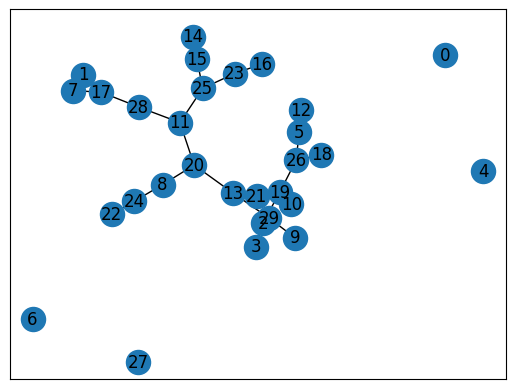

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.gnm_random_graph(30,25)

nx.draw_networkx(G, with_labels=True)
plt.show()

distances = dict(nx.all_pairs_shortest_path_length(G))

## Terminology

- The ***distance*** d(u,v) between two vertices is the (weighted) length of the shortest path between them
- The ***eccentricity*** of a vertex v, e(v), is its maximum distance to any other vertex
- The ***radius*** of a connected graph, r(G), is the minimum eccentricity of any vertex
- The ***diameter*** of a connected graph, d(G), is the maximum eccentricity of any vertex
- The ***effective diameter*** of a graph is smallest number that is larger than the eccentricity of a large fraction of the vertices in the graph
- A graph G is said to exhibit a ***small-world property*** if its average path length scales logarithmically

## Centrality

Centrality is a measure of the importance of a node in a network. Nodes with higher centrality are considered more important. One measure of centrality is degree centrality, which is simply the number of edges incident on a node. Another measure is eccentricity centrality, which is the inverse of the maximum distance from a node to any other node in the graph. Closeness centrality, on the other hand, is defined as the inverse of the sum of the distances from a node to all other nodes in the graph. Nodes with high closeness centrality are considered more central in the network, as they can reach other nodes more quickly.

The more central a node the faster it can reach other nodes

Measures for centrality

- Degree and Eccentricity centrality
- Closeness centrality
- Betweenness centrality

### Degree and Eccentricity Centrality

Degree centrality is simply the number of edges incident on a node. In a directed graph, we distinguish between in-degree and out-degree. Eccentricity centrality is the inverse of the maximum distance from a node to any other node in the graph. Nodes with high degree or low eccentricity centrality are considered more central in the network.

- Centrality is a function c :V → R that induces a total order in V
– The higher the centrality of a vertex, the more important it is
- In degree centrality c (v i) =d (v i), the degree of the vertex
- In eccentricity centrality, the least eccentric vertex is the most central one, c (v i) = 1/e (v i)
– The least eccentric vertex is central
– The most eccentric vertex is peripheral
- In eccentricity centrality we aim to minimize the maximum distance

### Closeness Centrality

Closeness centrality is defined as the inverse of the sum of the distances from a node to all other nodes in the graph. Nodes with high closeness centrality are considered more central in the network, as they can reach other nodes more quickly. This measure is useful in situations where information or resources need to be spread quickly and efficiently through the network.

- In closeness centrality the vertex with least distance to all other vertices is the center
- We aim to minimize the average distance

### Betweenness Centrality

Betweenness centrality is a measure of the extent to which a node lies on the shortest paths between other nodes in the network. Nodes with high betweenness centrality are considered to be important bridges between different parts of the network. This measure is useful in identifying nodes that are critical for the flow of information or resources through the network.

- The node betweenness centrality or betweenness measures the number of shortest paths that travel through a node/vertex x
- Can also be defined for edges — edge betweenness
- Edges with high edge betweenness are called weak ties

Formula betweenness centrality b(x) of a vertex x: $$b(x) = \sum_{s \neq x \neq t} \frac{\sigma_{st}(x)}{\sigma_{st}}$$
$$\sigma_{st} = \text{number of shortest paths from s to t}$$
$$\sigma_{st}(x) = \text{number of shortest paths from s to t that pass through x}$$



## Eccentricity

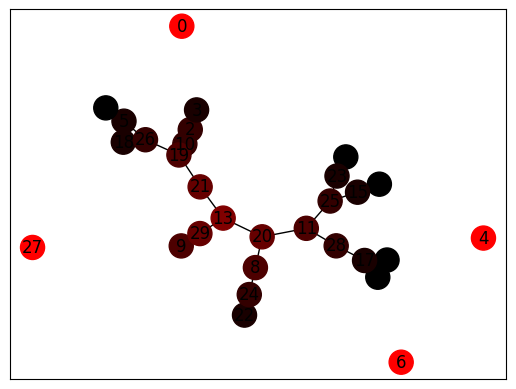

In [9]:
def eccentricity(G, node, distances):
  return max([distances[node][n] for n in G.nodes if n in distances[node]])
eccentricities = [eccentricity(G, i, distances) for i in G.nodes]

nx.draw_networkx(G, node_color=[(1-(j- min(eccentricities))/(max(eccentricities) - min(eccentricities)),0,0) for j in eccentricities], with_labels = True)
plt.show()

## Radius and Diameter

In [10]:
def radius(eccentricities):
  return min(eccentricities)
print(radius(eccentricities))

0


In [11]:
def diameter(eccentricities):
  return max(eccentricities)
print(diameter(eccentricities))

10


## Closeness Centrality

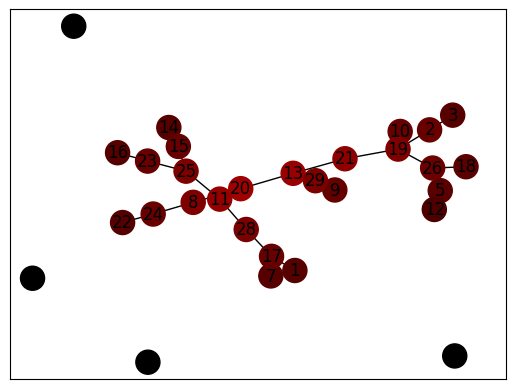

In [13]:
def closeness(G, node, distances):
  divider = sum([distances[node][n] for n in G.nodes if n in distances[node]])
  if divider == 0:
    return 0
  return 1/divider
closenesses = [closeness(G, i, distances) for i in G.nodes]
nx.draw_networkx(G, node_color=[(min(1,j*50),0,0) for j in closenesses], with_labels = True)
plt.show()

## How to Compute Betweenness?

Girvan-Newman algorithm:
- Construct a rooted graph
- Compute node labels using BFS - top down
- Compute credit asighnment from step 2 - bottom up
- Aggregate credit from step 3 to compute betweenness

## Graph Laplacian

The graph Laplacian is a matrix that is closely related to the adjacency matrix of a graph. It is defined as the difference between the diagonal matrix of vertex degrees and the adjacency matrix. The graph Laplacian has a number of important properties and applications in graph theory and machine learning, including spectral clustering and diffusion maps. It can also be used to compute the betweenness centrality of nodes in a graph.

- Eigenvalues are non-negative real numbers
- Eigenvectors are real and orthogonal

## Graph Clustering

Graph clustering is the process of grouping vertices in a graph into clusters or communities based on their connectivity. The goal is to identify groups of vertices that are more densely connected to one another than to vertices in other clusters. There are many different algorithms for graph clustering, including spectral clustering, modularity maximization, and hierarchical clustering. Graph clustering is widely used in many different domains, including social network analysis, bioinformatics, and image processing.

## Eigenvectors

Eigenvectors are an important concept in graph theory and machine learning. In the context of graph theory, the eigenvectors of the adjacency matrix and the graph Laplacian can be used to partition the graph into communities or clusters.

## Spectral Clustering Algorithm



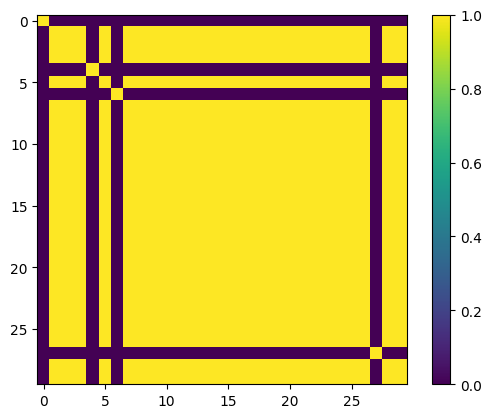

In [14]:
import numpy as np
adjacency_matrix = np.zeros((len(G.nodes), len(G.nodes)))
for i in range(len(G.nodes)):
  for j in range(len(G.nodes)):
    if j in distances[i]:
      adjacency_matrix[i][j] = 1
plt.imshow(adjacency_matrix)
plt.colorbar()
plt.show()

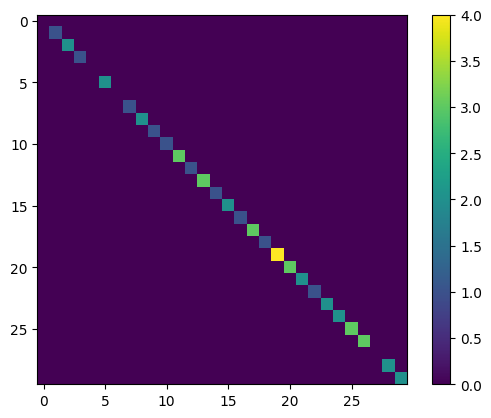

In [15]:
degree_matrix = np.zeros((len(G.nodes), len(G.nodes)))
for i in range(len(G.nodes)):
  degree_matrix[i,i] = G.degree[i]
plt.imshow(degree_matrix)
plt.colorbar()
plt.show()

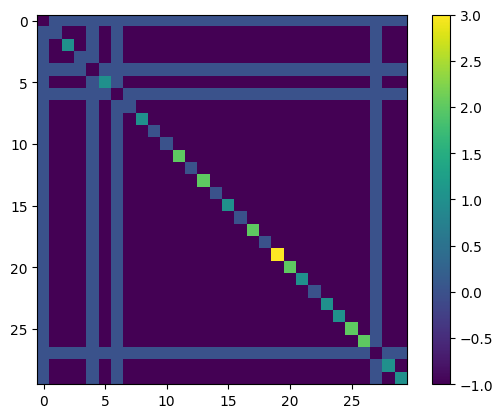

In [16]:
laplacian_matrix = degree_matrix - adjacency_matrix
plt.imshow(laplacian_matrix)
plt.colorbar()
plt.show()

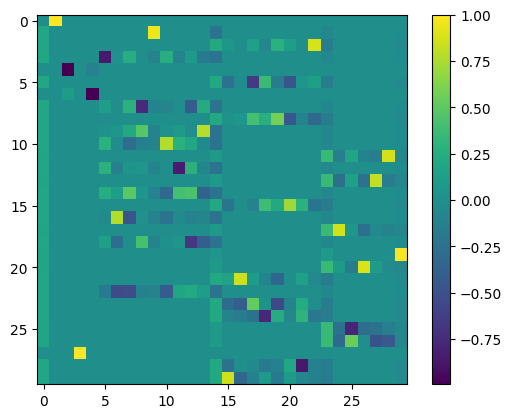

In [17]:
from numpy import linalg as LA
eigen_values, eigen_vectors = LA.eigh(laplacian_matrix)
plt.imshow(eigen_vectors)
plt.colorbar()
plt.show()

We can now perform clustering on this eigen vector. We have taken the 2nd eigen vector here for instance.

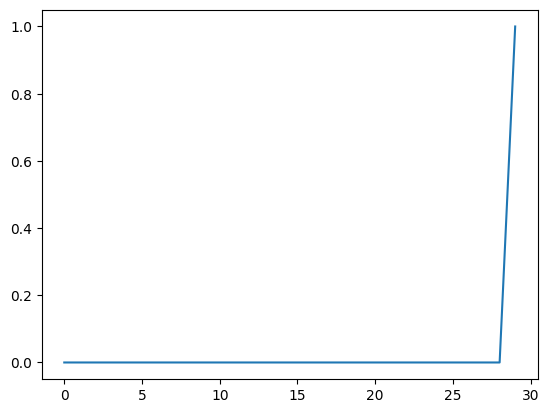

In [18]:
lambda_2_vector = eigen_vectors[:,1]
plt.plot(sorted(lambda_2_vector))

Here we will use the first 5 eigen vectors to perform a Kmeans and cluster the graph.

C:\Users\rafal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rafal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


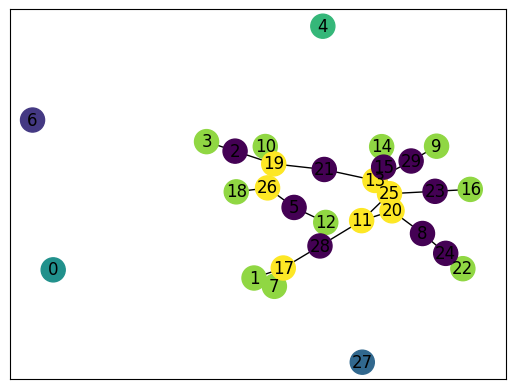

In [20]:
k = 5
X = eigen_vectors[:, :k]

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)
labels = kmeans.fit_predict(X)

nx.draw_networkx(G, node_color=labels, with_labels = True)

## k-Way Spectral Clustering

Two appoaaches:
1. Recursive bi-partitioning
  - Recursivaly apply bi-partiotining algorithm in a hierarchical divisive manner
  - Disadvantage: inefficient, unstable
2. Cluster multiple eigenvectors
  - build a reduces space from multiple eigenvectors
  - commonly used in recent papers
  - preferable approach

## Node and Graph Embeddings

Represent each node with a single vector. We would use this embedding to find missing node labels or predict new connections based on node similarities.

Represent the whole graph with a single vector. Used to make predictions on graph level, e.g. labelling of chemical structures.

## Random Walks

Random walks are a way of exploring the graph structure to create node embeddings. Starting at a node, we take a random step to one of its neighbors and continue the process for a fixed number of steps. These walks can be repeated multiple times to generate a set of random walks for each node, and the resulting sequences can be used to train a language model to obtain node embeddings.

1. Estimate probability of visiting node v on a random walk starting from node u using some random walk strategy R.
2. Optimize embeddings to encode these random walk statistics

## Why Random Walks?

- Expressivity: Flexible stochastic definition of node similarity that incorporates both local and higher-order neighbourhood information
- Efficiency: Do not need to consider all node pairs when training, only need to consider pairs that co-occur on random walks

Two basic stages:
1. create training data
  - use random walks -> **fixed window, biased**
2. training or optimization
  - Given and input node train to predict RW nodes -> **Skip-gram with negative sampling**

There are several types of random walks, including:

- Simple Random Walk: At each step, move uniformly at random to one of the neighbors of the current node.
- Biased Random Walk: At each step, move to one of the neighbors of the current node with a probability that depends on some property of the nodes, such as their degree or some other graph statistic.

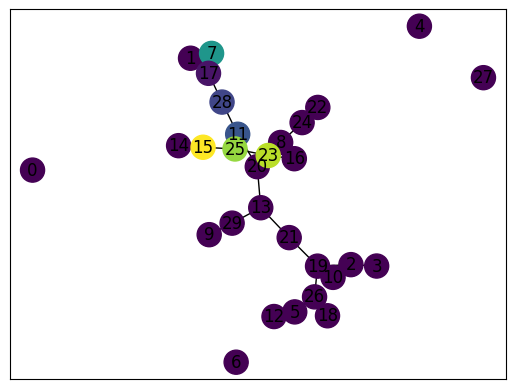

In [22]:
def get_random_walk(G, node, depth = 5):
  if depth == 0: return [node]
  neighbours = list(G.neighbors(node))
  if len(neighbours) == 0: return [node]
  nextNode = np.random.choice(neighbours)
  return [node, *get_random_walk(G, nextNode, depth - 1)]
walk = get_random_walk(G, 1, 20)
nx.draw_networkx(G, node_color=[walk.index(i) if i in walk else 0 for i in range(len(G.nodes))], with_labels = True)

## Random walk embeding

In [23]:
import random

def get_new_dataset(G, n, sizes = 5):
  nodes_len = len(G.nodes)
  X, y = np.zeros((n, nodes_len)), np.zeros((n, nodes_len))
  for i in range(n):
    selected_node = random.randint(0, nodes_len-1)
    walk = get_random_walk(G, selected_node, sizes)[1:]
    X[i,selected_node] = 1
    y[i, walk] = 1
  return X, y

X, y = get_new_dataset(G, 100)

### Making a model with 10 dimensional embedding vector

In [31]:
# !pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(10, input_shape=(X.shape[1],), activation=None, use_bias=False))
model.add(Dense(y.shape[1], activation=None, use_bias=False))

ModuleNotFoundError: No module named 'tensorflow.keras'

### Training the model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 1000
for i in range(epochs):
  X, y = get_new_dataset(G, 500)
  model.fit(X, y, epochs=1, batch_size=500)

### Clustering with kmeans using the weights for the firs part of the skip gram model

In [ ]:
def embedd(node, n):
  input = np.zeros((1, n))
  input[0,node] = 1
  return model.layers[0](input)


In [ ]:
kmeans = KMeans(n_clusters=7)
labels = kmeans.fit_predict([embedd(i, len(G.nodes))[0] for i in G.nodes])

nx.draw(G, node_color=labels, with_labels = True)